<a href="https://colab.research.google.com/github/VivekShahare04/ML-Projects/blob/main/chlorine_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
df = df.drop(['Sulfate','Trihalomethanes','Organic_carbon'],axis=1)

In [25]:
df

,ph,Hardness,Solids,chlorine,Conductivity,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,1.708954,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,2.062575,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,-0.094032,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,-0.778830,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-0.343939,0.138786,0
...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,1.240155,0.601124,1
3272,4.953704e-01,-0.085667,-0.534295,0.593290,-0.417706,-1.497627,1
3273,1.591254e+00,-0.626829,1.270810,0.144017,0.072263,-0.856007,1
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,-0.288597,0.950797,1


In [30]:
df.shape

(3276, 7)

In [9]:
df = df.rename(columns={'Chloramines':'chlorine'})

In [24]:
df

,ph,Hardness,Solids,chlorine,Conductivity,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,1.708954,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,2.062575,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,-0.094032,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,-0.778830,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-0.343939,0.138786,0
...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,1.240155,0.601124,1
3272,4.953704e-01,-0.085667,-0.534295,0.593290,-0.417706,-1.497627,1
3273,1.591254e+00,-0.626829,1.270810,0.144017,0.072263,-0.856007,1
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,-0.288597,0.950797,1


In [11]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
chlorine,0
Conductivity,0
Turbidity,0
Potability,0


In [12]:
df['ph'] = df['ph'].fillna(df['ph'].mean())

In [13]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
chlorine,0
Conductivity,0
Turbidity,0
Potability,0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['ph', 'Hardness', 'Solids', 'chlorine', 'Conductivity', 'Turbidity']] = scaler.fit_transform(
    df[['ph', 'Hardness', 'Solids', 'chlorine', 'Conductivity', 'Turbidity']]
)


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability', axis=1)  # Features
y = df['Potability']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Results:
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       412
           1       0.50      0.30      0.38       244

    accuracy                           0.63       656
   macro avg       0.58      0.56      0.56       656
weighted avg       0.61      0.63      0.60       656


SVM Results:
Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       412
           1       0.64      0.18      0.28       244

    accuracy                           0.66       656
   macro avg       0.65      0.56      0.53       656
weighted avg       0.65      0.66      0.59       656



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:30:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       412
           1       0.46      0.37      0.41       244

    accuracy                           0.60       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.60      0.59       656



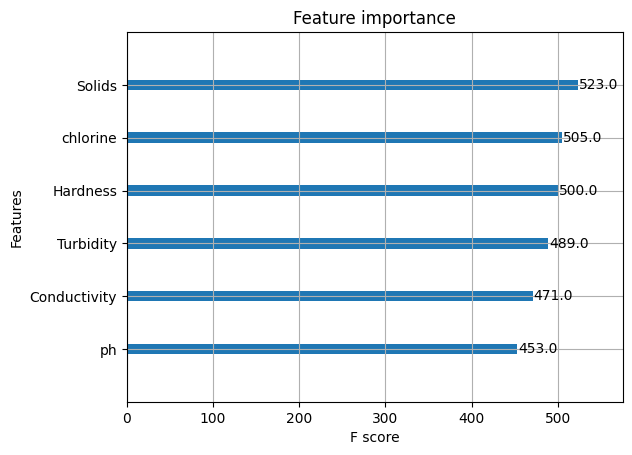

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance for XGBoost
xgb_model = models['XGBoost']
plot_importance(xgb_model)
plt.show()


In [26]:
import pandas as pd

# Sample dataset with similar columns
data = {
    'ph': [7.0, 8.1, 6.5, 5.5,6.84],
    'Hardness': [150, 180, 120, 160,159.188],
    'Solids': [20000, 21000, 15000, 19000,12837.5],
    'chlorine': [7.5, 8.2, 5.5, 6.8,5.164],
    'Conductivity': [450, 470, 400, 460,558.81],
    'Turbidity': [3.5, 4.1, 3.0, 4.0,4.396]
}#6.848331559049443,159.18805013792684,12837.506062969442,5.164448054837886,373.99171050123624,558.8155667445225,12.254080760936006,69.77221026672524,4.396604556065476,1


sample_df = pd.DataFrame(data)
print(sample_df)


     ph  Hardness   Solids  chlorine  Conductivity  Turbidity
0  7.00   150.000  20000.0     7.500        450.00      3.500
1  8.10   180.000  21000.0     8.200        470.00      4.100
2  6.50   120.000  15000.0     5.500        400.00      3.000
3  5.50   160.000  19000.0     6.800        460.00      4.000
4  6.84   159.188  12837.5     5.164        558.81      4.396


In [27]:
# Scaling the sample data using the same scaler from the training process
sample_scaled = scaler.transform(sample_df)


In [28]:
# Assuming 'xgb_model' is your trained XGBoost model
predictions = xgb_model.predict(sample_scaled)

# Print predictions (0 for non-potable, 1 for potable)
print("Predicted Potability:", predictions)


Predicted Potability: [0 0 0 0 1]
